## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.900416 -1.414277 -1.436559  1.405747 -0.834352  0.146192
1  0.045936  0.100667  1.354224 -1.371745 -0.455774 -0.360023
2 -0.702430 -0.718592 -0.198279 -0.016183 -0.618941 -1.042116
3 -0.273334 -1.690702  0.111409  0.154367  0.150537 -1.139540
4  0.280338  1.173446  1.261919 -1.281451  0.369341  0.483097


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9520006	total: 68.6ms	remaining: 1m 8s
1:	learn: 0.9426678	total: 69.3ms	remaining: 34.6s
2:	learn: 0.9315965	total: 69.8ms	remaining: 23.2s
3:	learn: 0.9218983	total: 70.4ms	remaining: 17.5s
4:	learn: 0.9125968	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9028945	total: 71.5ms	remaining: 11.8s
6:	learn: 0.8925554	total: 72.1ms	remaining: 10.2s
7:	learn: 0.8857442	total: 72.8ms	remaining: 9.03s
8:	learn: 0.8770010	total: 73.4ms	remaining: 8.08s
9:	learn: 0.8697394	total: 73.9ms	remaining: 7.32s
10:	learn: 0.8596497	total: 74.4ms	remaining: 6.69s
11:	learn: 0.8523157	total: 75ms	remaining: 6.18s
12:	learn: 0.8434623	total: 75.5ms	remaining: 5.73s
13:	learn: 0.8357284	total: 76ms	remaining: 5.36s
14:	learn: 0.8287555	total: 76.6ms	remaining: 5.03s
15:	learn: 0.8209741	total: 77.1ms	remaining: 4.74s
16:	learn: 0.8131190	total: 77.6ms	remaining: 4.49s
17:	learn: 0.8054124	total: 78.1ms	remaining: 4.26s
18:	learn: 0.7994651	total: 78.5ms	remaining: 4.

85:	learn: 0.4508005	total: 109ms	remaining: 1.15s
86:	learn: 0.4471139	total: 109ms	remaining: 1.14s
87:	learn: 0.4433981	total: 110ms	remaining: 1.13s
88:	learn: 0.4397281	total: 110ms	remaining: 1.13s
89:	learn: 0.4370006	total: 111ms	remaining: 1.12s
90:	learn: 0.4335883	total: 111ms	remaining: 1.11s
91:	learn: 0.4307256	total: 111ms	remaining: 1.1s
92:	learn: 0.4273668	total: 112ms	remaining: 1.09s
93:	learn: 0.4245065	total: 112ms	remaining: 1.08s
94:	learn: 0.4216349	total: 113ms	remaining: 1.07s
95:	learn: 0.4186206	total: 113ms	remaining: 1.06s
96:	learn: 0.4149161	total: 113ms	remaining: 1.05s
97:	learn: 0.4117753	total: 114ms	remaining: 1.05s
98:	learn: 0.4083131	total: 114ms	remaining: 1.04s
99:	learn: 0.4053508	total: 115ms	remaining: 1.03s
100:	learn: 0.4026914	total: 115ms	remaining: 1.02s
101:	learn: 0.3993604	total: 115ms	remaining: 1.01s
102:	learn: 0.3962608	total: 116ms	remaining: 1.01s
103:	learn: 0.3935501	total: 116ms	remaining: 1s
104:	learn: 0.3909444	total: 11

250:	learn: 0.1464637	total: 187ms	remaining: 558ms
251:	learn: 0.1454574	total: 187ms	remaining: 556ms
252:	learn: 0.1446210	total: 188ms	remaining: 554ms
253:	learn: 0.1440561	total: 188ms	remaining: 553ms
254:	learn: 0.1431594	total: 189ms	remaining: 551ms
255:	learn: 0.1422486	total: 189ms	remaining: 550ms
256:	learn: 0.1414056	total: 190ms	remaining: 549ms
257:	learn: 0.1406160	total: 190ms	remaining: 547ms
258:	learn: 0.1396362	total: 191ms	remaining: 545ms
259:	learn: 0.1387780	total: 191ms	remaining: 544ms
260:	learn: 0.1380569	total: 191ms	remaining: 542ms
261:	learn: 0.1373341	total: 192ms	remaining: 541ms
262:	learn: 0.1362453	total: 193ms	remaining: 539ms
263:	learn: 0.1353219	total: 193ms	remaining: 538ms
264:	learn: 0.1343712	total: 194ms	remaining: 537ms
265:	learn: 0.1334187	total: 194ms	remaining: 535ms
266:	learn: 0.1323267	total: 195ms	remaining: 534ms
267:	learn: 0.1315871	total: 195ms	remaining: 533ms
268:	learn: 0.1308076	total: 196ms	remaining: 531ms
269:	learn: 

476:	learn: 0.0454478	total: 291ms	remaining: 319ms
477:	learn: 0.0453111	total: 292ms	remaining: 319ms
478:	learn: 0.0450590	total: 292ms	remaining: 318ms
479:	learn: 0.0448125	total: 293ms	remaining: 317ms
480:	learn: 0.0445716	total: 293ms	remaining: 316ms
481:	learn: 0.0443362	total: 294ms	remaining: 316ms
482:	learn: 0.0440909	total: 294ms	remaining: 315ms
483:	learn: 0.0438816	total: 295ms	remaining: 314ms
484:	learn: 0.0437846	total: 295ms	remaining: 313ms
485:	learn: 0.0435743	total: 296ms	remaining: 313ms
486:	learn: 0.0434019	total: 296ms	remaining: 312ms
487:	learn: 0.0433079	total: 296ms	remaining: 311ms
488:	learn: 0.0431021	total: 297ms	remaining: 310ms
489:	learn: 0.0430461	total: 297ms	remaining: 309ms
490:	learn: 0.0428439	total: 298ms	remaining: 309ms
491:	learn: 0.0424863	total: 298ms	remaining: 308ms
492:	learn: 0.0422933	total: 299ms	remaining: 307ms
493:	learn: 0.0420732	total: 299ms	remaining: 306ms
494:	learn: 0.0418734	total: 300ms	remaining: 306ms
495:	learn: 

644:	learn: 0.0200866	total: 370ms	remaining: 204ms
645:	learn: 0.0199495	total: 370ms	remaining: 203ms
646:	learn: 0.0198523	total: 371ms	remaining: 202ms
647:	learn: 0.0197078	total: 371ms	remaining: 202ms
648:	learn: 0.0195744	total: 372ms	remaining: 201ms
649:	learn: 0.0194434	total: 372ms	remaining: 200ms
650:	learn: 0.0193147	total: 373ms	remaining: 200ms
651:	learn: 0.0192231	total: 373ms	remaining: 199ms
652:	learn: 0.0191373	total: 374ms	remaining: 199ms
653:	learn: 0.0190047	total: 374ms	remaining: 198ms
654:	learn: 0.0189902	total: 374ms	remaining: 197ms
655:	learn: 0.0188919	total: 375ms	remaining: 197ms
656:	learn: 0.0187683	total: 375ms	remaining: 196ms
657:	learn: 0.0186806	total: 376ms	remaining: 195ms
658:	learn: 0.0185388	total: 376ms	remaining: 195ms
659:	learn: 0.0185097	total: 377ms	remaining: 194ms
660:	learn: 0.0183902	total: 377ms	remaining: 193ms
661:	learn: 0.0182979	total: 377ms	remaining: 193ms
662:	learn: 0.0181612	total: 378ms	remaining: 192ms
663:	learn: 

871:	learn: 0.0074822	total: 475ms	remaining: 69.7ms
872:	learn: 0.0074370	total: 475ms	remaining: 69.1ms
873:	learn: 0.0074195	total: 475ms	remaining: 68.5ms
874:	learn: 0.0073814	total: 476ms	remaining: 68ms
875:	learn: 0.0073480	total: 477ms	remaining: 67.5ms
876:	learn: 0.0073115	total: 477ms	remaining: 66.9ms
877:	learn: 0.0072947	total: 478ms	remaining: 66.4ms
878:	learn: 0.0072512	total: 478ms	remaining: 65.8ms
879:	learn: 0.0072120	total: 478ms	remaining: 65.2ms
880:	learn: 0.0071677	total: 479ms	remaining: 64.7ms
881:	learn: 0.0071643	total: 479ms	remaining: 64.1ms
882:	learn: 0.0071140	total: 480ms	remaining: 63.6ms
883:	learn: 0.0070794	total: 480ms	remaining: 63ms
884:	learn: 0.0070391	total: 481ms	remaining: 62.5ms
885:	learn: 0.0070358	total: 481ms	remaining: 61.9ms
886:	learn: 0.0069935	total: 481ms	remaining: 61.3ms
887:	learn: 0.0069729	total: 482ms	remaining: 60.8ms
888:	learn: 0.0069318	total: 482ms	remaining: 60.2ms
889:	learn: 0.0069116	total: 483ms	remaining: 59.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

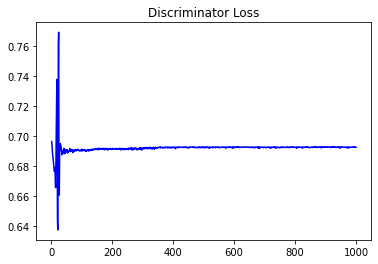

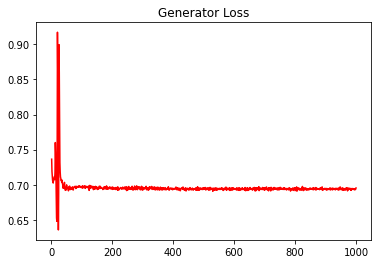

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1032844501067806


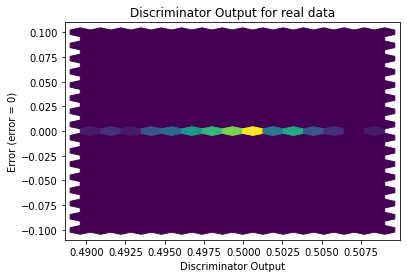

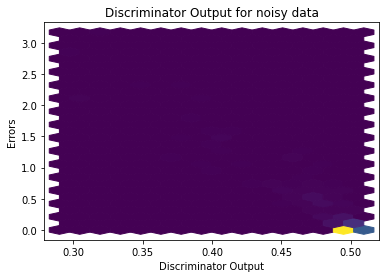

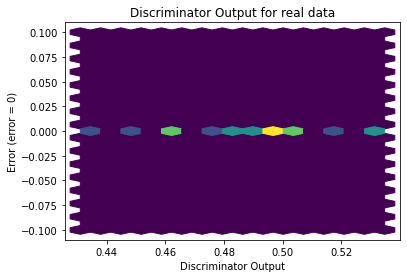

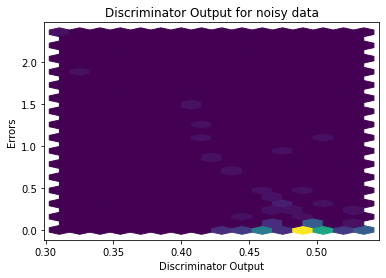

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


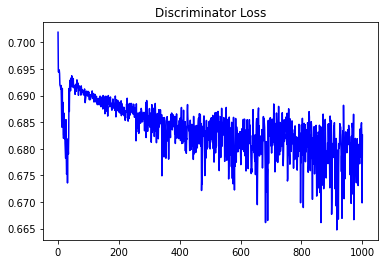

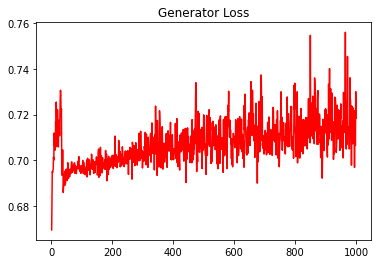

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0990229995971296


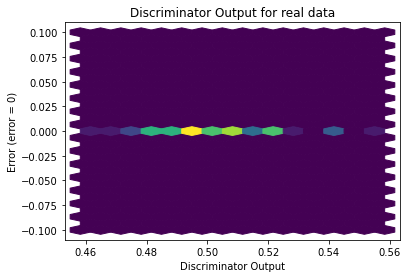

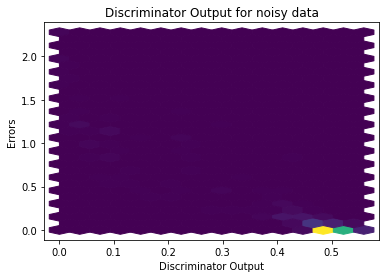

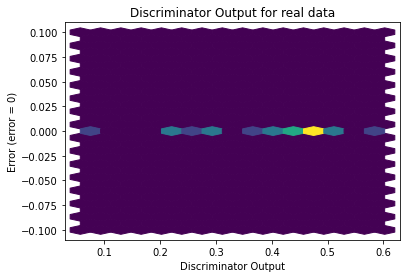

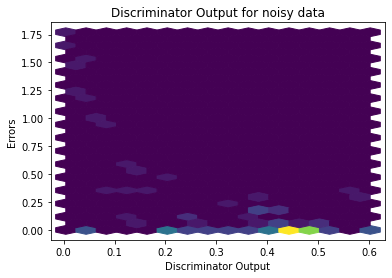

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1984]], requires_grad=True)
